In [1]:
!pip install --upgrade gensim

In [2]:
from sentiment_data_loader import SentimentCorpus, split_train_dev_test
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
from nltk.stem import WordNetLemmatizer

import codecs
import numpy as np
import re
lemmatizer = WordNetLemmatizer()

import gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

import gensim.downloader as api

import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words()

np.random.seed(0)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rjkhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
review_data = SentimentCorpus()

In [4]:
### Using the Sentiment Reader File to read the Data
train_datas_class_count = [0]*2
for x in review_data.train_y:
    train_datas_class_count[x[0]]= train_datas_class_count[x[0]] + 1
    
test_datas_class_count = [0]*2
for x in review_data.test_y:
    test_datas_class_count[x[0]]=test_datas_class_count[x[0]] + 1
    
print( "No of instances/ records",review_data.nr_instances,
       "\nNo of Features/vocabulary", review_data.nr_features,
        "\nTraining data",
        "\n      Class 0",train_datas_class_count[0],
        "\n      Class 1",train_datas_class_count[1],
        "\nTest data",
        "\n      Class 0",test_datas_class_count[0],
        "\n      Class 1",test_datas_class_count[1],
)

No of instances/ records 2000 
No of Features/vocabulary 13989 
Training data 
      Class 0 788 
      Class 1 812 
Test data 
      Class 0 212 
      Class 1 188


In [24]:
review_data.train_X

array([[0., 1., 2., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
### Trying all the 9 possibilities As asked in the Question 
all_models = []
neural_network_layers = [(100),(100,100),(100,100,100)]
activation_functions = ['logistic', 'tanh', 'relu']

#iterating through all posibilities
for hl in neural_network_layers:
    for af in activation_functions:
        mlp = MLPClassifier(hidden_layer_sizes=hl, max_iter=250, activation=af, verbose=True)
        mlp.fit(review_data.train_X, review_data.train_y )
        #Storing the model data to check the performance Later
        all_models.append((mlp,[hl,af]))

C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.69790198
Iteration 2, loss = 0.56836016
Iteration 3, loss = 0.48332215
Iteration 4, loss = 0.41652979
Iteration 5, loss = 0.35759091
Iteration 6, loss = 0.30564353
Iteration 7, loss = 0.26020212
Iteration 8, loss = 0.22100937
Iteration 9, loss = 0.18790537
Iteration 10, loss = 0.15960235
Iteration 11, loss = 0.13658806
Iteration 12, loss = 0.11718672
Iteration 13, loss = 0.10082764
Iteration 14, loss = 0.08748046
Iteration 15, loss = 0.07653256
Iteration 16, loss = 0.06719802
Iteration 17, loss = 0.05939353
Iteration 18, loss = 0.05281226
Iteration 19, loss = 0.04720042
Iteration 20, loss = 0.04244885
Iteration 21, loss = 0.03833782
Iteration 22, loss = 0.03475778
Iteration 23, loss = 0.03168539
Iteration 24, loss = 0.02900554
Iteration 25, loss = 0.02660099
Iteration 26, loss = 0.02452652
Iteration 27, loss = 0.02269184
Iteration 28, loss = 0.02105383
Iteration 29, loss = 0.01958528
Iteration 30, loss = 0.01830186
Iteration 31, loss = 0.01710769
Iteration 32, los

C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.59787358
Iteration 2, loss = 0.24123484
Iteration 3, loss = 0.12855757
Iteration 4, loss = 0.07874813
Iteration 5, loss = 0.05183127
Iteration 6, loss = 0.03629691
Iteration 7, loss = 0.02674915
Iteration 8, loss = 0.02054501
Iteration 9, loss = 0.01620101
Iteration 10, loss = 0.01316544
Iteration 11, loss = 0.01097224
Iteration 12, loss = 0.00932029
Iteration 13, loss = 0.00803417
Iteration 14, loss = 0.00701906
Iteration 15, loss = 0.00619514
Iteration 16, loss = 0.00549379
Iteration 17, loss = 0.00492949
Iteration 18, loss = 0.00444100
Iteration 19, loss = 0.00404257
Iteration 20, loss = 0.00367439
Iteration 21, loss = 0.00338157
Iteration 22, loss = 0.00311830
Iteration 23, loss = 0.00287977
Iteration 24, loss = 0.00267676
Iteration 25, loss = 0.00249397
Iteration 26, loss = 0.00232734
Iteration 27, loss = 0.00218382
Iteration 28, loss = 0.00204882
Iteration 29, loss = 0.00193432
Iteration 30, loss = 0.00182565
Iteration 31, loss = 0.00172716
Iteration 32, los

C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.64058469
Iteration 2, loss = 0.33354807
Iteration 3, loss = 0.18362353
Iteration 4, loss = 0.10759132
Iteration 5, loss = 0.06636041
Iteration 6, loss = 0.04366806
Iteration 7, loss = 0.03055390
Iteration 8, loss = 0.02257505
Iteration 9, loss = 0.01739252
Iteration 10, loss = 0.01395617
Iteration 11, loss = 0.01149181
Iteration 12, loss = 0.00960513
Iteration 13, loss = 0.00823056
Iteration 14, loss = 0.00714219
Iteration 15, loss = 0.00622520
Iteration 16, loss = 0.00549624
Iteration 17, loss = 0.00489453
Iteration 18, loss = 0.00440015
Iteration 19, loss = 0.00397469
Iteration 20, loss = 0.00362136
Iteration 21, loss = 0.00330058
Iteration 22, loss = 0.00302382
Iteration 23, loss = 0.00278951
Iteration 24, loss = 0.00258048
Iteration 25, loss = 0.00239816
Iteration 26, loss = 0.00223233
Iteration 27, loss = 0.00208658
Iteration 28, loss = 0.00195546
Iteration 29, loss = 0.00183503
Iteration 30, loss = 0.00172931
Iteration 31, loss = 0.00163054
Iteration 32, los

C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.72470537
Iteration 2, loss = 0.68044427
Iteration 3, loss = 0.64687374
Iteration 4, loss = 0.60964875
Iteration 5, loss = 0.54942417
Iteration 6, loss = 0.47324370
Iteration 7, loss = 0.38660203
Iteration 8, loss = 0.30321071
Iteration 9, loss = 0.22861568
Iteration 10, loss = 0.16947736
Iteration 11, loss = 0.12505975
Iteration 12, loss = 0.09287316
Iteration 13, loss = 0.06952441
Iteration 14, loss = 0.05330886
Iteration 15, loss = 0.04198382
Iteration 16, loss = 0.03393692
Iteration 17, loss = 0.02814252
Iteration 18, loss = 0.02360335
Iteration 19, loss = 0.02023211
Iteration 20, loss = 0.01756890
Iteration 21, loss = 0.01545842
Iteration 22, loss = 0.01382331
Iteration 23, loss = 0.01237153
Iteration 24, loss = 0.01121736
Iteration 25, loss = 0.01024768
Iteration 26, loss = 0.00941099
Iteration 27, loss = 0.00870535
Iteration 28, loss = 0.00807312
Iteration 29, loss = 0.00754295
Iteration 30, loss = 0.00705152
Iteration 31, loss = 0.00662610
Iteration 32, los

C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.61832918
Iteration 2, loss = 0.23681082
Iteration 3, loss = 0.08284331
Iteration 4, loss = 0.02692458
Iteration 5, loss = 0.00982272
Iteration 6, loss = 0.00434505
Iteration 7, loss = 0.00258005
Iteration 8, loss = 0.00185904
Iteration 9, loss = 0.00146916
Iteration 10, loss = 0.00123724
Iteration 11, loss = 0.00107559
Iteration 12, loss = 0.00095838
Iteration 13, loss = 0.00087277
Iteration 14, loss = 0.00079803
Iteration 15, loss = 0.00073779
Iteration 16, loss = 0.00068394
Iteration 17, loss = 0.00064045
Iteration 18, loss = 0.00059899
Iteration 19, loss = 0.00056429
Iteration 20, loss = 0.00053257
Iteration 21, loss = 0.00050361
Iteration 22, loss = 0.00047875
Iteration 23, loss = 0.00045474
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.67064115
Iteration 2, loss = 0.42756086
Iteration 3, loss = 0.19169272
Iteration 4, loss = 0.06748877
Iteration 5, loss = 0.02231552
Iteration 6, loss = 0.00844627
Iteration 7, loss = 0.00437839
Iteration 8, loss = 0.00271431
Iteration 9, loss = 0.00193319
Iteration 10, loss = 0.00151104
Iteration 11, loss = 0.00124934
Iteration 12, loss = 0.00106131
Iteration 13, loss = 0.00093255
Iteration 14, loss = 0.00083015
Iteration 15, loss = 0.00074178
Iteration 16, loss = 0.00067212
Iteration 17, loss = 0.00061005
Iteration 18, loss = 0.00056081
Iteration 19, loss = 0.00051421
Iteration 20, loss = 0.00047745
Iteration 21, loss = 0.00044346
Iteration 22, loss = 0.00041628
Iteration 23, loss = 0.00038977
Iteration 24, loss = 0.00036622
Iteration 25, loss = 0.00034627
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.70181159
Iteration 2, loss = 0.69177037
Iteration 3, loss = 0.68440476
Iteration 4, loss = 0.66734302
Iteration 5, loss = 0.62317877
Iteration 6, loss = 0.52704277
Iteration 7, loss = 0.38189040
Iteration 8, loss = 0.23598933
Iteration 9, loss = 0.13127188
Iteration 10, loss = 0.07354934
Iteration 11, loss = 0.04330336
Iteration 12, loss = 0.02900808
Iteration 13, loss = 0.01921323
Iteration 14, loss = 0.01459082
Iteration 15, loss = 0.01191638
Iteration 16, loss = 0.01010327
Iteration 17, loss = 0.00878487
Iteration 18, loss = 0.00783162
Iteration 19, loss = 0.00706652
Iteration 20, loss = 0.00646934
Iteration 21, loss = 0.00593707
Iteration 22, loss = 0.00550780
Iteration 23, loss = 0.00513344
Iteration 24, loss = 0.00480857
Iteration 25, loss = 0.00452395
Iteration 26, loss = 0.00426904
Iteration 27, loss = 0.00404454
Iteration 28, loss = 0.00384292
Iteration 29, loss = 0.00366267
Iteration 30, loss = 0.00349468
Iteration 31, loss = 0.00334457
Iteration 32, los

C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.57686492
Iteration 2, loss = 0.12877452
Iteration 3, loss = 0.01825807
Iteration 4, loss = 0.00303332
Iteration 5, loss = 0.00059995
Iteration 6, loss = 0.00034377
Iteration 7, loss = 0.00026923
Iteration 8, loss = 0.00024125
Iteration 9, loss = 0.00022693
Iteration 10, loss = 0.00021795
Iteration 11, loss = 0.00021172
Iteration 12, loss = 0.00020661
Iteration 13, loss = 0.00020238
Iteration 14, loss = 0.00019867
Iteration 15, loss = 0.00019519
Iteration 16, loss = 0.00019210
Iteration 17, loss = 0.00018899
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.67193027
Iteration 2, loss = 0.42527769
Iteration 3, loss = 0.15409551
Iteration 4, loss = 0.03436537
Iteration 5, loss = 0.00702513
Iteration 6, loss = 0.00208985
Iteration 7, loss = 0.00100657
Iteration 8, loss = 0.00065996
Iteration 9, loss = 0.00051732
Iteration 10, loss = 0.00043937
Iteration 11, loss = 0.00039018
Iteration 12, loss = 0.00035817
Iteration 13, loss = 0.00033120
Iteration 14, loss = 0.00031129
Iteration 15, loss = 0.00029306
Iteration 16, loss = 0.00027727
Iteration 17, loss = 0.00026438
Iteration 18, loss = 0.00025261
Iteration 19, loss = 0.00024178
Iteration 20, loss = 0.00023232
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [6]:
def test_score(model,model_config):
    ### Function to show the performance of the Models
    predictions_train = model.predict(review_data.train_X)
    print("Accuracy score for trained data",accuracy_score(predictions_train, review_data.train_y))
    predictions_test = model.predict(review_data.test_X)
    print("Accuracy score for test data", accuracy_score(predictions_test, review_data.test_y))
    print("Confusion matrix for training dataset")
    print(confusion_matrix(predictions_train, review_data.train_y))
    print("Confusion matrix for test dataset")
    print(confusion_matrix(predictions_test, review_data.test_y))
    print("\n")
    print(classification_report(predictions_test, review_data.test_y))
    PrecisionRecallDisplay.from_predictions(review_data.test_y, predictions_test)

Model Configuration  [100, 'logistic']
Accuracy score for trained data 1.0
Accuracy score for test data 0.8575
Confusion matrix for training dataset
[[788   0]
 [  0 812]]
Confusion matrix for test dataset
[[177  22]
 [ 35 166]]


              precision    recall  f1-score   support

           0       0.83      0.89      0.86       199
           1       0.88      0.83      0.85       201

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

Model Configuration  [100, 'tanh']
Accuracy score for trained data 1.0
Accuracy score for test data 0.8475
Confusion matrix for training dataset
[[788   0]
 [  0 812]]
Confusion matrix for test dataset
[[176  25]
 [ 36 163]]


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       201
           1       0.87      0.82      0.84       199

    accuracy                           0.85       4

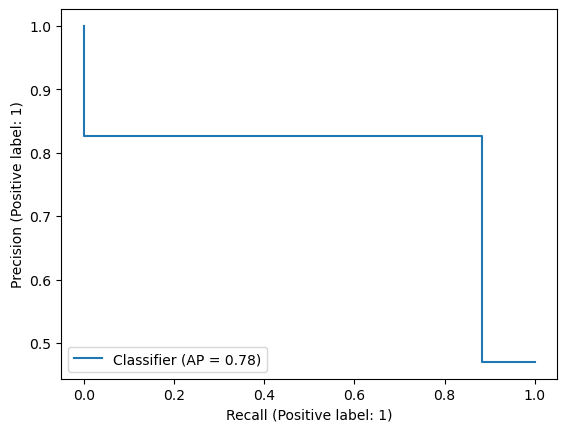

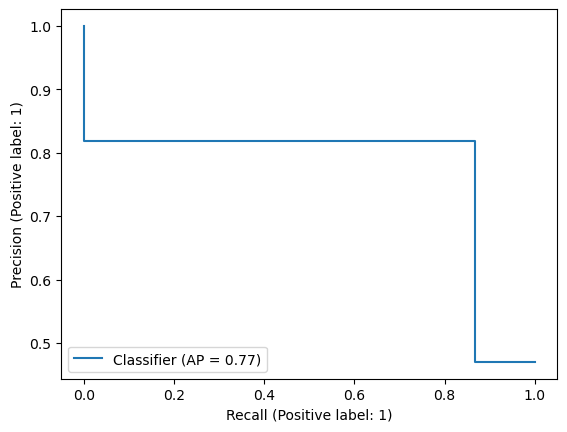

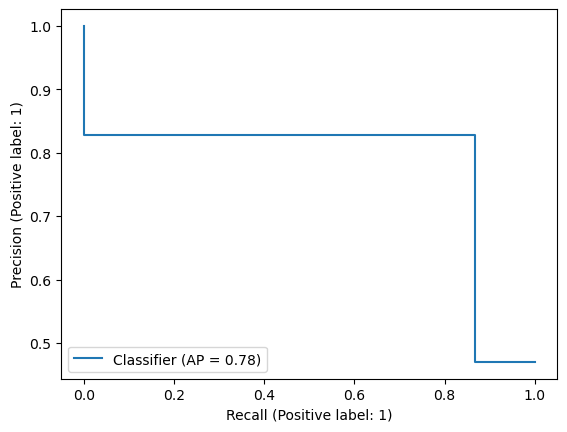

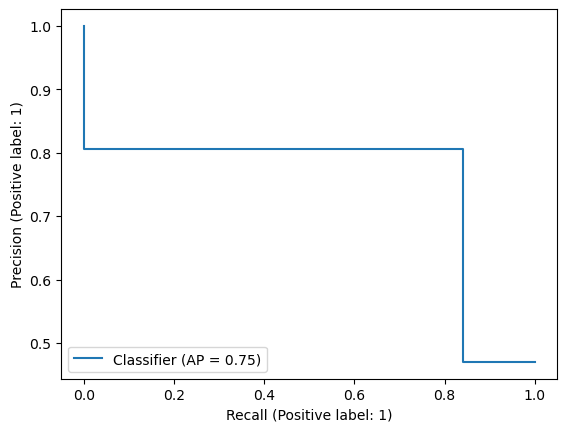

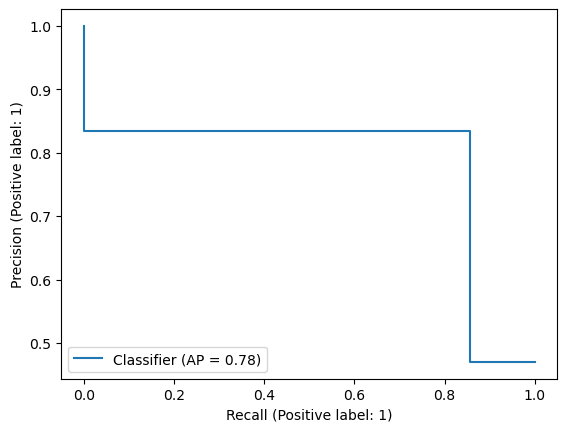

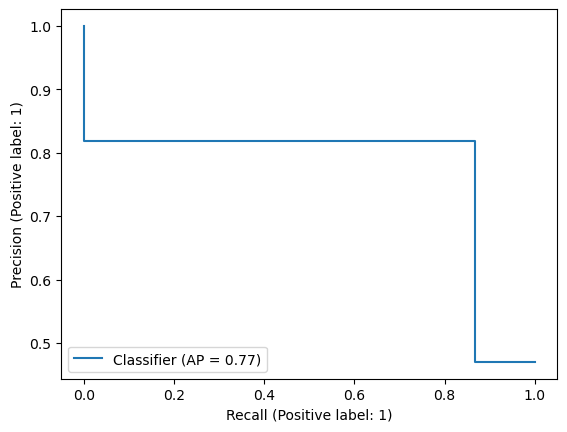

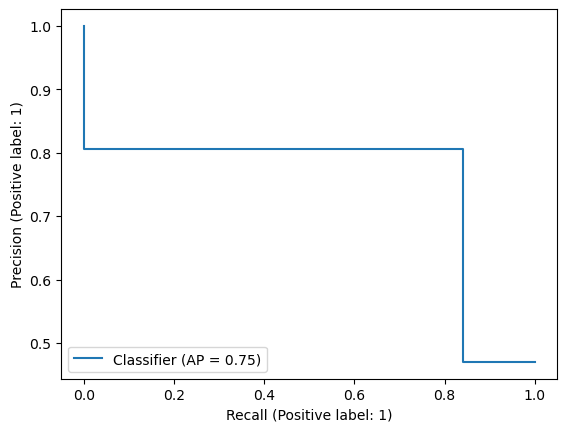

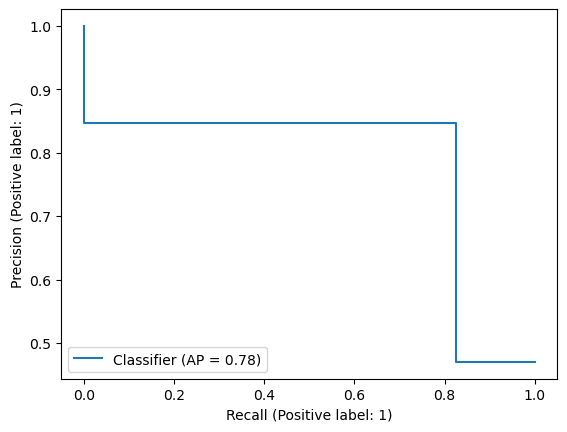

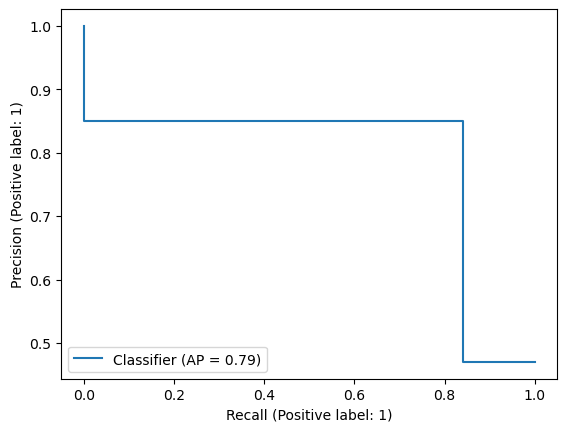

In [7]:
for model in all_models:
    print("Model Configuration ",model[1])
    test_score(model[0],model[1])

Accuracy score for trained data 1.0
Accuracy score for test data 0.855
Confusion matrix for training dataset
[[788   0]
 [  0 812]]
Confusion matrix for test dataset
[[184  30]
 [ 28 158]]


              precision    recall  f1-score   support

           0       0.87      0.86      0.86       214
           1       0.84      0.85      0.84       186

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.86       400



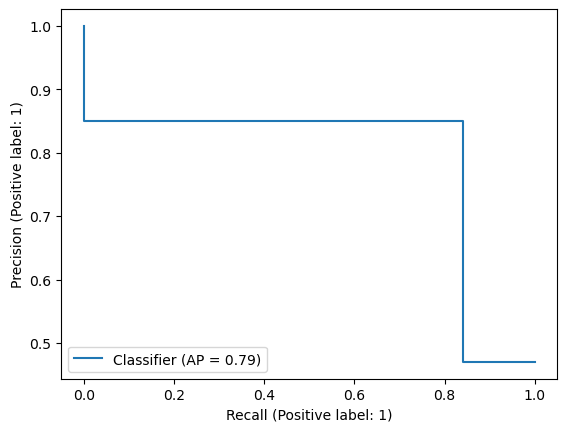

In [8]:
test_score(all_models[8][0],all_models[8][0])

In [9]:
# Logic to read the data from the file and preprocess it
X=[]
def remove__(S):
    ### Function to split the string with hyphen or underscore
    new_tokens = []
    for toks in S:
        if "_" or "-" in toks:
            name, counts = toks.split(":")
            for x in re.split(r"[_\-]+",name):
                new_tokens.append(x+":"+counts)
        else:
            new_tokens.append(toks)
    return new_tokens


def read_x_y(file,x):
    ### Function to read data from the and preprocess it
    ### Preprocess includes converting to lower case, removing the number and stopwords, allowing only the words
    with codecs.open(file, 'r', 'utf8') as pos_file:
        for line in pos_file:
            line= line.lower()
            toks = line.split(" ")
            toks =remove__(toks)
            words=[]
            for feat in toks[0:-1]:
                name, counts = feat.split(":")
                if name not in stop_words and name.isalpha():
                    words.append(lemmatizer.lemmatize(name))
            x.append(words)
            


read_x_y("positive.review", X)
nr_positive_reviews = len(X)
read_x_y("negative.review", X)
Y = np.vstack((np.zeros([nr_positive_reviews,1], dtype=int), np.ones([len(X)-nr_positive_reviews,1], dtype=int)))

In [10]:
X[0:5],Y

([['hole',
   'top',
   'secret',
   'center',
   'civilans',
   'pacific',
   'navy',
   'lot',
   'surface',
   'book',
   'named',
   'foot',
   'strongly',
   'put',
   'norman',
   'johnson',
   'lawes',
   'top',
   'support',
   'ten',
   'random',
   'typhoon',
   'phycologist',
   'pressure',
   'day',
   'johnson',
   'strange',
   'civilans',
   'explored',
   'support',
   'pacific',
   'ocean',
   'pressure',
   'back',
   'read',
   'stuck',
   'remote',
   'american',
   'find',
   'crichton',
   'black',
   'hole',
   'misssion',
   'strange',
   'half',
   'mile',
   'navy',
   'remote',
   'location',
   'story',
   'behavior',
   'civilans',
   'research',
   'michael',
   'crichton',
   'excellant',
   'strongly',
   'recommend',
   'michael',
   'strange',
   'thing',
   'sphere',
   'joined',
   'mile',
   'long',
   'put',
   'operation',
   'spacecraft',
   'joined',
   'american',
   'half',
   'pacific',
   'civilans',
   'information',
   'day',
   'half',
  

In [11]:
### Api to download and load the Word2vec 
model = api.load("word2vec-google-news-300")

In [13]:
### Logic to perform the 
vector = model['give']
print(len(vector),vector)
X_Embedded = []
for x in X:
    n = 0
    temp = np.zeros(shape=vector.shape, dtype=float)
    for word in x:
        try:
            vector = model[word]
        except Exception:
            continue
        n+=1
        temp = np.add(temp, vector)
    #Performing Mean pooling
    temp= np.divide(temp, n)
    X_Embedded.append(temp)    

300 [ 6.20117188e-02 -1.22558594e-01  1.68457031e-02  8.69140625e-02
  7.66601562e-02 -7.03125000e-02  1.45507812e-01 -3.80859375e-02
  4.76074219e-02  2.03125000e-01 -2.24609375e-01 -1.22558594e-01
 -3.46679688e-02  3.47656250e-01 -5.61523438e-02  2.69531250e-01
  8.49609375e-02  7.47070312e-02 -1.59179688e-01 -2.02636719e-02
 -5.24902344e-02 -5.39550781e-02  1.92382812e-01  2.29492188e-01
  4.61425781e-02 -3.24707031e-02 -1.10351562e-01 -7.91015625e-02
 -6.07910156e-02  1.74804688e-01 -6.34765625e-02  4.79125977e-03
 -3.43750000e-01  7.61718750e-02 -5.66406250e-02 -1.22070312e-01
  1.63085938e-01  1.59912109e-02 -7.47070312e-02  1.51367188e-01
  8.34960938e-02  5.29785156e-02  1.68945312e-01  3.34472656e-02
 -5.27343750e-02 -1.28906250e-01 -1.00585938e-01 -5.24902344e-02
  1.62109375e-01  2.59765625e-01 -1.23046875e-01  2.01171875e-01
  6.29882812e-02 -3.38745117e-03 -1.40625000e-01  3.17382812e-02
 -1.36718750e-01  1.05468750e-01 -7.95898438e-02 -2.12890625e-01
  1.79687500e-01 -2.2

n =  112
n =  243
n =  332
n =  200
n =  61
n =  192
n =  149
n =  37
n =  176
n =  170
n =  205
n =  377
n =  631
n =  19
n =  224
n =  497
n =  91
n =  519
n =  79
n =  21
n =  75
n =  711
n =  62
n =  725
n =  64
n =  78
n =  195
n =  372
n =  142
n =  203
n =  79
n =  78
n =  684
n =  165
n =  20
n =  412
n =  236
n =  484
n =  69
n =  62
n =  153
n =  48
n =  338
n =  132
n =  92
n =  17
n =  380
n =  44
n =  46
n =  102
n =  30
n =  171
n =  103
n =  136
n =  44
n =  214
n =  231
n =  97
n =  207
n =  139
n =  51
n =  41
n =  177
n =  153
n =  343
n =  273
n =  220
n =  41
n =  39
n =  69
n =  503
n =  494
n =  73
n =  37
n =  119
n =  146
n =  176
n =  82
n =  47
n =  41
n =  82
n =  49
n =  248
n =  125
n =  107
n =  104
n =  740
n =  218
n =  48
n =  44
n =  141
n =  115
n =  35
n =  82
n =  154
n =  245
n =  97
n =  39
n =  22
n =  358
n =  113
n =  18
n =  141
n =  29
n =  346
n =  136
n =  146
n =  30
n =  79
n =  70
n =  133
n =  43
n =  79
n =  133
n =  127
n =  304
n =  

n =  962
n =  407
n =  22
n =  199
n =  132
n =  384
n =  85
n =  432
n =  156
n =  141
n =  43
n =  265
n =  64
n =  13
n =  19
n =  295
n =  97
n =  150
n =  27
n =  377
n =  50
n =  102
n =  35
n =  168
n =  84
n =  210
n =  90
n =  401
n =  157
n =  116
n =  278
n =  92
n =  79
n =  181
n =  219
n =  63
n =  254
n =  43
n =  33
n =  195
n =  132
n =  166
n =  122
n =  50
n =  82
n =  40
n =  86
n =  553
n =  267
n =  75
n =  94
n =  206
n =  504
n =  87
n =  87
n =  71
n =  122
n =  21
n =  159
n =  50
n =  531
n =  54
n =  31
n =  111
n =  140
n =  211
n =  48
n =  165
n =  235
n =  22
n =  187
n =  404
n =  227
n =  77
n =  168
n =  432
n =  48
n =  35
n =  72
n =  55
n =  129
n =  38
n =  334
n =  133
n =  158
n =  35
n =  521
n =  22
n =  349
n =  71
n =  46
n =  100
n =  61
n =  835
n =  94
n =  83
n =  344
n =  23
n =  246
n =  118
n =  107
n =  70
n =  188
n =  20
n =  528
n =  112
n =  110
n =  255
n =  33
n =  185
n =  108
n =  82
n =  135
n =  158
n =  207
n =  663
n =  4

n =  142
n =  160
n =  70
n =  227
n =  649
n =  64
n =  76
n =  207
n =  411
n =  97
n =  514
n =  727
n =  180
n =  109
n =  141
n =  254
n =  546
n =  128
n =  163
n =  218
n =  98
n =  139
n =  94
n =  157
n =  32
n =  207
n =  45
n =  189
n =  435
n =  348
n =  24
n =  149
n =  90
n =  79
n =  39
n =  174
n =  93
n =  188
n =  145
n =  14
n =  114
n =  34
n =  109
n =  123
n =  510
n =  246
n =  405
n =  238
n =  97
n =  84
n =  597
n =  523
n =  95
n =  26
n =  450
n =  572
n =  239
n =  146
n =  82
n =  49
n =  133
n =  70
n =  111
n =  415
n =  491
n =  170
n =  66
n =  72
n =  211
n =  126
n =  17
n =  131
n =  208
n =  93
n =  336
n =  113
n =  22
n =  381
n =  113
n =  114
n =  38
n =  75
n =  444
n =  245
n =  253
n =  230
n =  66
n =  52
n =  304
n =  108
n =  27
n =  148
n =  215
n =  76
n =  68
n =  126
n =  54
n =  111
n =  167
n =  238
n =  334
n =  175
n =  100
n =  178
n =  89
n =  81
n =  229
n =  255
n =  134
n =  30
n =  38
n =  349
n =  277
n =  55
n =  26
n =  4

In [14]:
#Logic to shuffle the records
X_Embedded= np.array(X_Embedded)
Y= np.array(Y)
new_order = np.arange(len(Y))
np.random.shuffle(new_order)
X_Embedded = X_Embedded[new_order,:]
Y = Y[new_order,:]

In [25]:
X_Embedded[0:5]

array([[ 0.08483946,  0.01732197,  0.02084173, ..., -0.07800613,
         0.00803693,  0.03369416],
       [ 0.04032861,  0.02374937, -0.03442801, ..., -0.02238353,
        -0.00908531, -0.02877547],
       [ 0.04445129,  0.01227202,  0.00535108, ..., -0.05605149,
         0.0227796 , -0.00781159],
       [-0.00379793, -0.01923468,  0.00137676, ..., -0.02183986,
         0.00983723,  0.00140602],
       [ 0.04913921,  0.00857398, -0.01460519, ..., -0.03292092,
         0.03446993, -0.00181115]])

In [19]:
# Reusing the function from the sentiment reader to split the Datas
train_y, dev_y, test_y, train_X, dev_X, test_X = split_train_dev_test(X_Embedded, Y,0.8,0,0.2)

In [20]:
train_datas_class_count = [0]*2
for x in train_y:
    train_datas_class_count[x[0]]= train_datas_class_count[x[0]] + 1
    
test_datas_class_count = [0]*2
for x in test_y:
    test_datas_class_count[x[0]]=test_datas_class_count[x[0]] + 1
    
print( "No of instances/ records",len(Y)," plus ",len(X_Embedded),
        "\nTraining data",
        "\n      Class 0",train_datas_class_count[0],
        "\n      Class 1",train_datas_class_count[1],
        "\nTest data",
        "\n      Class 0",test_datas_class_count[0],
        "\n      Class 1",test_datas_class_count[1],
)

No of instances/ records 2000  plus  2000 
Training data 
      Class 0 797 
      Class 1 803 
Test data 
      Class 0 203 
      Class 1 197


In [26]:
#With the input data changed using the best config from the previous step
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=250, activation='tanh',verbose=True)
mlp.fit(train_X,train_y )

C:\Users\rjkhe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.69251214
Iteration 2, loss = 0.65569717
Iteration 3, loss = 0.59290068
Iteration 4, loss = 0.51523798
Iteration 5, loss = 0.47567471
Iteration 6, loss = 0.45413069
Iteration 7, loss = 0.42768412
Iteration 8, loss = 0.41237994
Iteration 9, loss = 0.40018129
Iteration 10, loss = 0.38718082
Iteration 11, loss = 0.37729550
Iteration 12, loss = 0.36764402
Iteration 13, loss = 0.36193021
Iteration 14, loss = 0.35474752
Iteration 15, loss = 0.34878846
Iteration 16, loss = 0.34820828
Iteration 17, loss = 0.33987130
Iteration 18, loss = 0.33760176
Iteration 19, loss = 0.34069504
Iteration 20, loss = 0.35028249
Iteration 21, loss = 0.34078329
Iteration 22, loss = 0.32675992
Iteration 23, loss = 0.32247960
Iteration 24, loss = 0.32589692
Iteration 25, loss = 0.32342279
Iteration 26, loss = 0.32015025
Iteration 27, loss = 0.33251586
Iteration 28, loss = 0.35571380
Iteration 29, loss = 0.34464974
Iteration 30, loss = 0.34124309
Iteration 31, loss = 0.32440172
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100),
              max_iter=250, verbose=True)

Accuracy score for trained data 0.874375
Accuracy score for test data 0.7975
Confusion matrix for training dataset
[[726 130]
 [ 71 673]]
Confusion matrix for test dataset
[[170  48]
 [ 33 149]]


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       218
           1       0.76      0.82      0.79       182

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



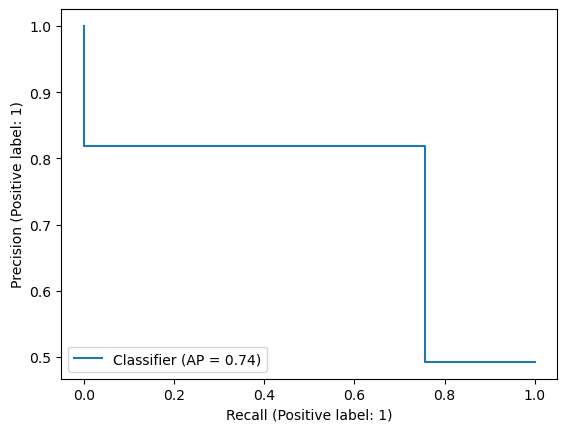

In [27]:
#Performance of the new model
predictions_train = mlp.predict(train_X)
print("Accuracy score for trained data",accuracy_score(predictions_train, train_y))
predictions_test = mlp.predict(test_X)
print("Accuracy score for test data", accuracy_score(predictions_test, test_y))
print("Confusion matrix for training dataset")
print(confusion_matrix(predictions_train,train_y))
print("Confusion matrix for test dataset")
print(confusion_matrix(predictions_test, test_y))
print("\n")
print(classification_report(predictions_test,test_y))
PrecisionRecallDisplay.from_predictions(test_y, predictions_test)